## Spectral Clustering and Semi-Supervised Learning

#### This notebook contains different values and imports that can be used in this practical session.
#### Please keep the same variable names when provided in your report to make the work of teaching assistants easier. 
#### You can still change the values given or the sizes of the datasets treated if you believe it is usefull to illustrate your point.

#### You can directly edit the markdown boxes to add your comments and answers to the questions

In [1]:
# Question 1 (imports and advised values):
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx
import numpy as np

n_samples = 200 # You can change these values
noise_level_list = [.05,.1,.2] # You can change these values

### Question 1 : Complete the code in the box below

In [2]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.2)

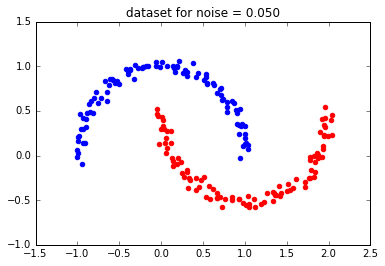

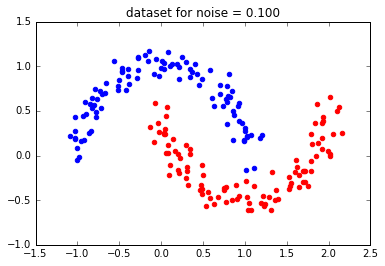

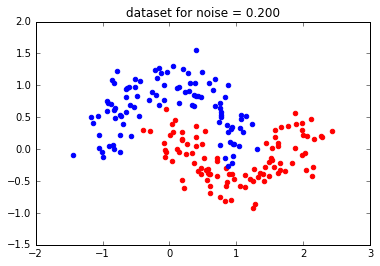

In [3]:
def plot_graph(x):
    colors = ['blue', 'red']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    noisy_moons = make_moons(n_samples = n_samples, noise = x)
    for i in range(len(noisy_moons[0])):
        ax.scatter(noisy_moons[0][i, 0]
                   , noisy_moons[0][i, 1]
                   , color = colors[noisy_moons[1][i]])
    plt.title('dataset for noise = %.3f' %x)
for n in noise_level_list:
    plot_graph(n)

In [4]:
# Question 2 :
from sklearn.neighbors import kneighbors_graph
n_neighbors_list = [1,5,10] # You can change these values

### Question 2 : Complete the code in the box below

In [5]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.02)
A = []
for i in range(3):
    A.append(kneighbors_graph(noisy_moons[0], n_neighbors_list[i], mode = 'connectivity', include_self=True))
A[1].toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

Visualize the graph

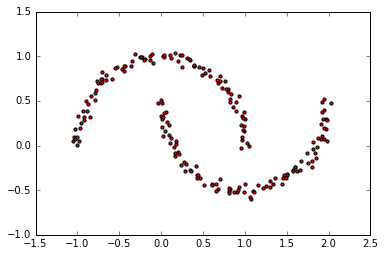

In [6]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.04)
pos = {}
for i in range(len(noisy_moons[0])):
    pos[i] = (noisy_moons[0][i][0], noisy_moons[0][i][1])

A = kneighbors_graph(noisy_moons[0]
                     , 1
                     , mode = 'connectivity', include_self=True)
G = nx.from_numpy_matrix(A.toarray())

nx.draw_networkx(G, pos, node_size=10, with_labels=False)

Plot several graphs for different values of noise and neighbors

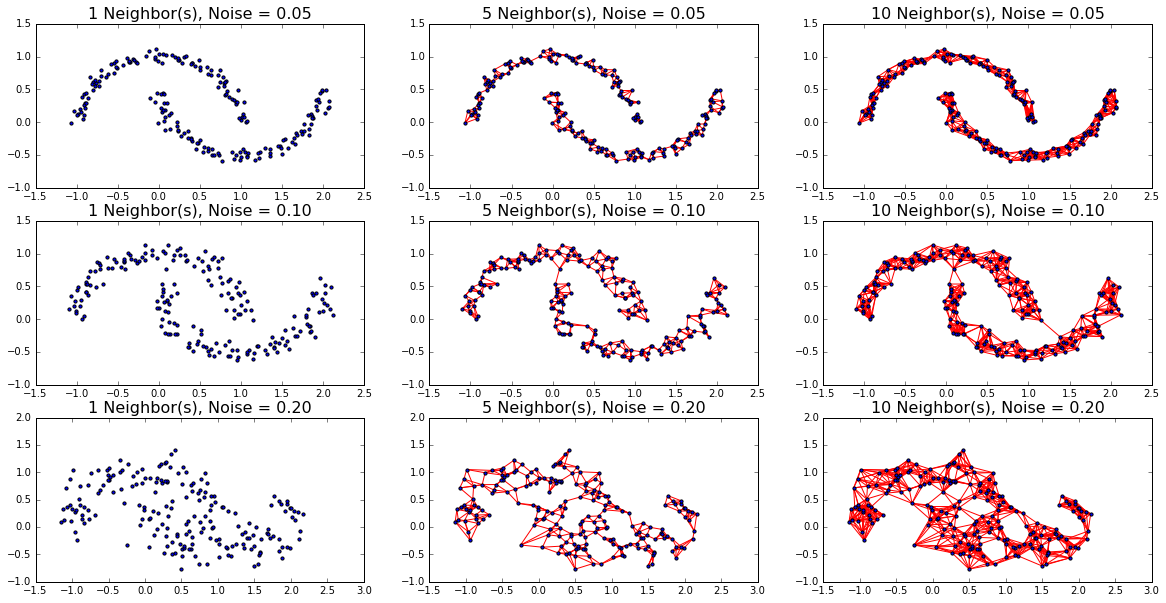

In [7]:
grid1 = []
grid2 = []

plt.figure(figsize=(20.0, 10.0))

for n in noise_level_list:
    
    noisy_moons = make_moons(n_samples = n_samples, noise = n)
    
    for neighbors in n_neighbors_list:
    
        pos = {}
        for i in range(len(noisy_moons[0])):
            pos[i] = (noisy_moons[0][i][0], noisy_moons[0][i][1])

        A = kneighbors_graph(noisy_moons[0]
                             , neighbors
                             , mode = 'connectivity', include_self=True)
        G = nx.from_numpy_matrix(A.toarray())

        grid1.append(G)
        grid2.append(pos)

noise_custom = []
for i in range(len(noise_level_list)*3):
    noise_custom.append(noise_level_list[int(i/3)])
    
for i in range(len(noise_level_list)*len(n_neighbors_list)):
    nx.draw_networkx(grid1[i], grid2[i] , edge_color = 'r', node_color = 'b', node_size=10, with_labels=False, ax=plt.subplot(len(noise_level_list),len(n_neighbors_list),i+1))
    plt.title("%1.f Neighbor(s), Noise = %0.02f" %(n_neighbors_list[i%3],noise_custom[i]) , fontsize=16)

In [8]:
# for n in noise_level_list:
    
#     noisy_moons = make_moons(n_samples = n_samples, noise = n)
    
#     for neighbors in n_neighbors_list:
    
#         pos = {}
#         for i in range(len(noisy_moons[0])):
#             pos[i] = (noisy_moons[0][i][0], noisy_moons[0][i][1])

#         A = kneighbors_graph(noisy_moons[0]
#                              , neighbors
#                              , mode = 'connectivity', include_self=True)
#         G = nx.from_numpy_matrix(A.toarray())

#         nx.draw_networkx(G, pos, node_size=10, with_labels=False)

Adjacency matrix

In [9]:
from matplotlib import pyplot, patches
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

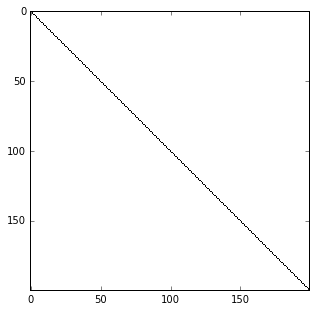

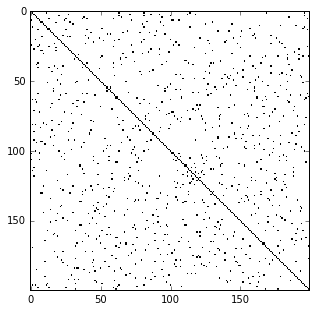

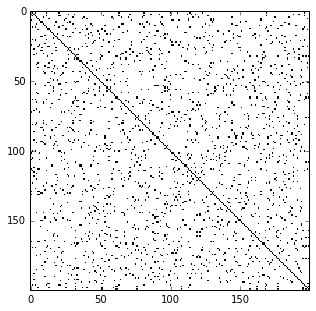

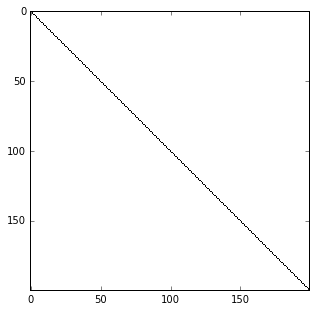

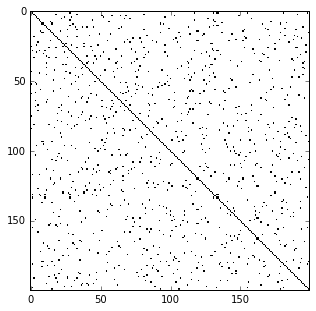

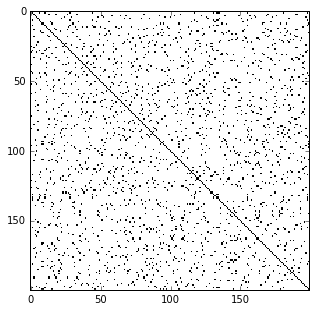

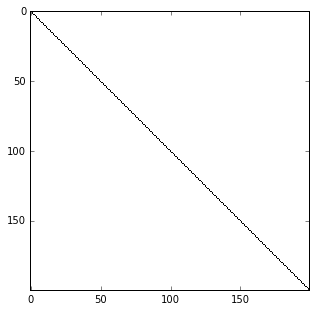

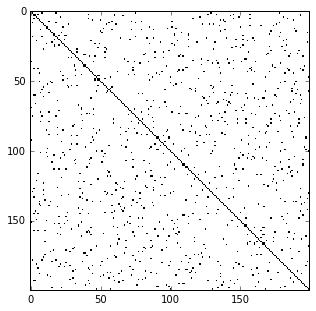

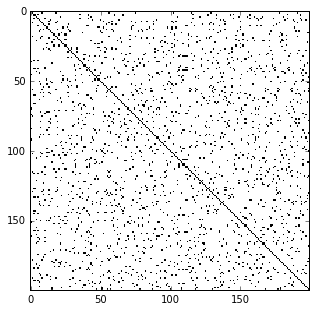

In [10]:
for n in noise_level_list:
    
    noisy_moons = make_moons(n_samples = n_samples, noise = n)
    A = []
    for i in range(len(n_neighbors_list)):
        A.append(kneighbors_graph(noisy_moons[0], n_neighbors_list[i], mode = 'connectivity', include_self=True))

    for i in range(len(n_neighbors_list)):
        G = nx.from_scipy_sparse_matrix(A[i])
        draw_adjacency_matrix(G)      

### Question 3 : Optimization problem 

- $vol(V) = f^TDf$

- $f^TLf = vol(V)Ncut(A, B)$

- solve $min_{f \in R^n}\frac{f^TLf}{f^TDf}$ subject to $f^TD1_n = 0$

### Question 4 : Complete the code in the box below



In [11]:
from sklearn.cluster import SpectralClustering

In [12]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.02)
# A = kneighbors_graph(noisy_moons[0], n_neighbors_list[1]
#                  , mode = 'connectivity', include_self=True)
X = noisy_moons[0]

In [13]:
model = SpectralClustering(n_clusters = 2)
model.fit(X)
data = model.fit_predict(X)

//anaconda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


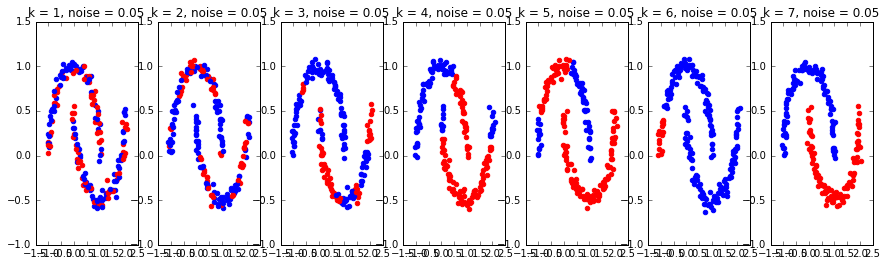

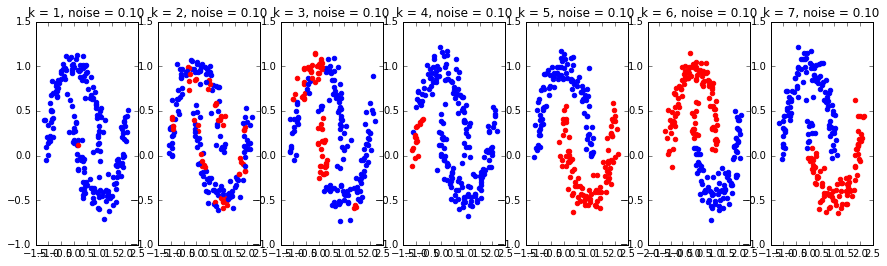

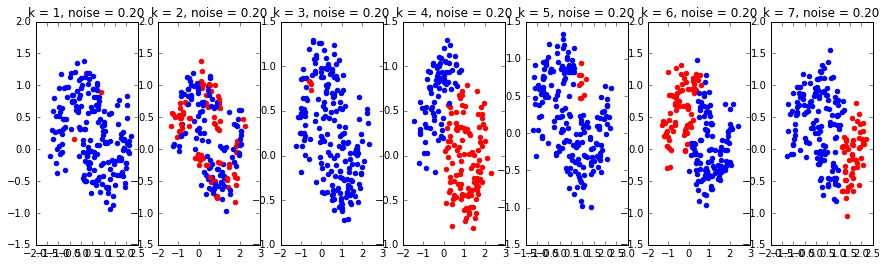

In [14]:
def plot_cluster(noise, cluster, neighbors_max):
    fig = plt.figure(figsize=(15.0,4.0))
    
    
    # Loop on different neighbors number, and plot for each of them
    for i in range(neighbors_max):
    
        model = SpectralClustering(n_clusters = cluster, affinity = 'nearest_neighbors'
                                   , n_neighbors = i + 1)
        X = make_moons(n_samples = n_samples, noise = noise)
        model.fit(X[0])
        data = model.fit_predict(X[0])
        colors = ['blue', 'red', 'green', 'pink', 'grey', 'orange', 'gold']
        ax = fig.add_subplot(1,neighbors_max, i+1)
        for j in range(len(X[0])):
            ax.scatter(X[0][j, 0]
                       , X[0][j, 1]
                       , color = colors[data[j]])
        plt.title('k = %1.f, noise = %.02f' %(i+1,noise))
#     model.affinity
    
# for i in range(10):
#     plot_cluster(0.05, 2, i + 1)
for nois in noise_level_list:
    plot_cluster(nois, 2, 7)

It seems that for low numbers of neighbours, the model is not accurate. When are in a situation of data underfitting. When we increase the number of neighbours, the model seems to become more accurate. However, we notice that if the number of neighbours becomes too large, the accuracy starts to decrease. We are then in an overfitting situation.
For example, for a noise equal to 0.1, the accuracy is maximal for $k=5$, and decreases afterwards.

### Question 5 : Complete the code in the box below

We first define functions to compute similarities

In [15]:
def similarity(C_1, C_2):
    return (C_1*C_2).sum() / np.sqrt((C_1*C_1).sum() * (C_2*C_2).sum())

def compute_C(clustering):
    
    elements = {}
    
    for element in set(clustering):
        
        elements[element] = []
        
        for i in range(len(clustering)):
            
            if clustering[i] == element:
                elements[element].append(i)
                
    C = np.zeros((len(clustering), len(clustering)))
    
    for i in elements.keys():
        
        for j in range(len(elements[i])):
            
            for k in range(len(elements[i])):
                if j != k:
                    C[j, k] = 1
    return C

Then, we implement the algorithm from the given paper

In [403]:
# Define parameters
f = 0.8
k_max = 20
noise = 0.001
C = 3
B = 10
S = np.zeros((B, k_max+1))


def stability(algo, dataset, B, C):
  
    S = np.zeros((B, k_max+1))
    bootstrap = []

    # Bootstrap on the initial dataset
    for i in range(B):
        idx = np.random.randint(len(dataset), size=f*len(dataset))
        bootstrap.append([dataset[idx, :], idx])

    # Loop on different values of clusters
    for k in range(2, k_max + 1):

        # clustering for initial X
        model = algo(n_clusters = C, affinity = 'nearest_neighbors'
                                   , n_neighbors = k)   
        model.fit(dataset)
        clustering_X = model.fit_predict(dataset)

        for i in range(B):

            # clustering for boostrapped partition
            model = algo(n_clusters = C, affinity = 'nearest_neighbors'
                                       , n_neighbors = k)
            model.fit(bootstrap[i][0])
            # affinity = model.affinity_matrix_
            clustering = model.fit_predict(bootstrap[i][0])
            C_bootstrap = compute_C(clustering)

            # We take the same points in initial as in the bootstrapped to have the 
            # same number of points
            C_initial = compute_C(clustering_X[bootstrap[i][1]])

            S[i, k] = similarity(C_bootstrap, C_initial)
            
    return S

### Question 6 : Complete the code in the box below

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
//anaconda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
//anaconda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


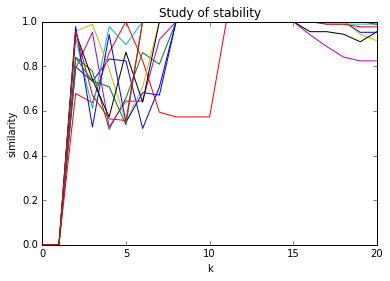

In [405]:
dataset = make_moons(n_samples = n_samples, noise = 0.001)[0]
S = stability(SpectralClustering, dataset, 10, 2)

for i in range(S.shape[0]):
    plt.plot(S[i])
    plt.xlabel('k')
    plt.ylabel('similarity')
    plt.title('Study of stability')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
//anaconda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
//anaconda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


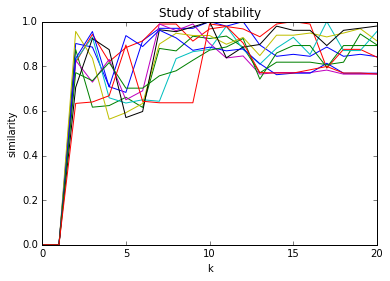

In [406]:
dataset = make_moons(n_samples = n_samples, noise = 0.5)[0]
S = stability(SpectralClustering, dataset, 10, 2)

for i in range(S.shape[0]):
    plt.plot(S[i])
    plt.xlabel('k')
    plt.ylabel('similarity')
    plt.title('Study of stability')

The stability criteria can in theory be useful as it can help choose the hyperparameter $k$ of the graph construction. However in this specific situation, it does not really help us much, as we notice that there is no obvious value of $k$ for which the stability is really improved. We can say though that $k=10$ seems to be an interesting choice.

### Question 7 : Complete the code in the box below

In [438]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph


def stability_2(algo, dataset, B, C):
  
    S = np.zeros((B, k_max+1))
    bootstrap = []

    # Bootstrap on the initial dataset
    for i in range(B):
        idx = np.random.randint(len(dataset), size=f*len(dataset))
        bootstrap.append([dataset[idx, :], idx])
    
    # Loop on different values of clusters
    for k in range(2, k_max + 1):
        
        #kneighbors_graph(bootstrap[1],k)

        # clustering for initial X
        connectivity = kneighbors_graph(dataset, n_neighbors = k, include_self = False)
        model = algo(n_clusters = C, connectivity = connectivity)
        model.fit(dataset)
        clustering_X = model.fit_predict(dataset)

        for i in range(B):

            # clustering for boostrapped partition
            connectivity2 = kneighbors_graph(bootstrap[i][0], n_neighbors = k, include_self = False)
            model = algo(n_clusters = C, connectivity = connectivity2)
            model.fit(bootstrap[i][0])
            # affinity = model.affinity_matrix_
            clustering = model.fit_predict(bootstrap[i][0])
            C_bootstrap = compute_C(clustering)

            # We take the same points in initial as in the bootstrapped to have the 
            # same number of points
            C_initial = compute_C(clustering_X[bootstrap[i][1]])

            S[i, k] = similarity(C_bootstrap, C_initial)
            
    return S


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:207: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
//anaconda/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:207: UserWarning: the number of connected components of the connectivity matrix is 28 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
//anaconda/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:207: UserWarning: the number of connected components of the connectivity matrix is 22 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connecti

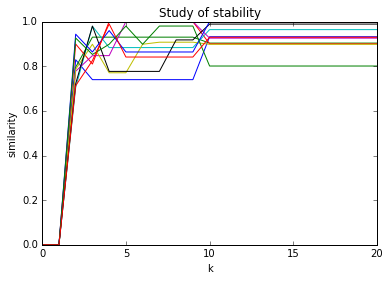

In [439]:
dataset = make_moons(n_samples = n_samples, noise = 0.5)[0]
S = stability_2(AgglomerativeClustering, dataset, 10, 2)

for i in range(10):
    plt.plot(S[i])
    plt.xlabel('k')
    plt.ylabel('similarity')
    plt.title('Study of stability')

Once again it seems that $k=10$ is a good choice.

### Experiment on MNIST

In [21]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [22]:
mnist.data.shape, mnist.target.shape, np.unique(mnist.target)

((70000, 784),
 (70000,),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]))

In [440]:
# Stratified sampling

f = 0.1 #degree of sampling
# Initialization
old = 0
new = list(mnist.target).index(1)
idx = np.random.randint(old, new, size=f*(new - old))
X = mnist.data[idx, :]
y = mnist.target[idx]

# Take f% of all classes
for i in list(np.unique(mnist.target))[1:-1]:
    new = list(mnist.target).index(i+1)
    idx = np.random.randint(old, new, size=f*(new - old))
    
    X = np.concatenate((X, mnist.data[idx, :]))
    y = np.concatenate((y, mnist.target[idx]))
    
    old = new
    

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [441]:
model = SpectralClustering(n_clusters = 10)
model.fit(X)
data = model.fit_predict(X)

//anaconda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [446]:
print('The accuracy of this model is: ', np.sum(data - y == 0)/ len(X))

The accuracy of this model is:  0.192525859193


## Semi-Supervised Learning

Choice of the dataset used : **Precise** which dataset you chose and why it is relevant for the semi-supervised learning Task

Advised datasets :

*Breast Cancer Wisconsin (Diagnostic) Database*

*MNIST binary even vs odd (multiple clusters inside each class)*

Feel free to use other datasets if they are relevant

In [26]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.cross_validation import train_test_split


### For all the next questions, use Cancer and Mnist classes to handle your data if you choose to use these one,
### You can also add more datasets but we advise you to handle them with this class for better readability
class semi_sup_dat:
    def __init__(self,data,p_unlabelled,name):
        # DON T CHANGE THE RANDOM STATES
        self.name = name
        if self.name == 'Mnist':
            # do an even vs odd binary classification :
            even = [0,2,4,6,8]
            Y = np.array([int(y in even) for y in data.target])
        else:
            Y = data.target
        X_lab, X_unlab, y_lab, y_unlab = train_test_split(data.data, Y, test_size=p_unlabelled, random_state=32)
        self.X_lab = X_lab
        self.X_unlab = X_unlab
        self.y_lab = y_lab
        self.y_unlab = y_unlab


# The following lines can be called later in the code to build a dataset with varying unlabelled proportion
p_unlabelled = 0.8 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')
digits = load_digits()

Mnist = semi_sup_dat(load_digits(), p_unlabelled,'Mnist')

We will work with Breast Cancer Wisconsin (Diagnostic) Database

In [27]:
Cancer.X_lab.shape, Cancer.X_unlab.shape, Cancer.y_lab.shape, Cancer.y_unlab.shape

((113, 30), (456, 30), (113,), (456,))

### Question 9 : Complete the code in the box below

In [302]:
#  Question 9  : Complete the function self_training
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def Self_Training(data_lab, data_unlab, target_lab, target_unlab):

    S = [data_lab, target_lab]
    U = [data_unlab, target_unlab]

    while (len(U[0]) != 0):

    #     print('eval len before change: ', len(U[1]))

        # Compute model at k
        model = KNeighborsClassifier(n_neighbors = 5)
        model.fit(S[0], S[1])

        # Select the most trusted elements
        proba = model.predict_proba(U[0])
        proba = pd.DataFrame(proba)
        pred = model.predict(U[0])

        m = max(proba[0].max(), proba[1].max())
        target = proba[(proba[0] == m) | (proba[1] == m)]
        notarget = proba[(proba[0] != m) & (proba[1] != m)]

        ########## Update Part ##########
        # Update S_0
        # print(S[0].shape)
        S[0] = np.concatenate((S[0], U[0][target.index]))
        S[1] = np.concatenate((S[1], pred[target.index]))
    #     print('index on which we are pretty sure: ', len(U[0][target.index]))
        # print(S[0].shape)

        # Update U
        U[0] = U[0][notarget.index]
        U[1] = U[1][notarget.index]

        if (len(U[0]) != 0):
            model_new = KNeighborsClassifier(n_neighbors = 5)
            model_new.fit(S[0], S[1])
        #     model.fit(S[0], S[1])

            clusters = model_new.predict(U[0])
        #     clusters_new = model_new.predict(U[0])
            print(np.sum(clusters == U[1])/len(clusters), len(clusters))
        else:
            break
    
    model_new = KNeighborsClassifier(n_neighbors = 5)
    model_new.fit(S[0], S[1])
    
    clusters = model_new.predict(S[0])
    
    return clusters

#     C_1 = compute_C(clusters)
#     C_2 = compute_C(clusters_new)

#     # similarity = similarity(C_1, C_2)
#     print((C_1*C_2).sum() / np.sqrt((C_1*C_1).sum() * (C_2*C_2).sum()))

In [303]:
len(noisy_moons[0])

200

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.0 5


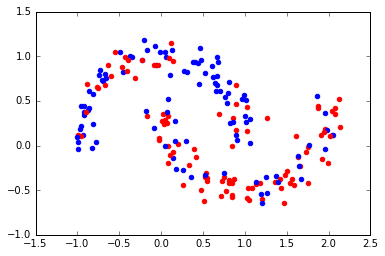

In [318]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.1)
p_unlabelled = 0.6
data_lab = noisy_moons[0][:(1-p_unlabelled)*len(noisy_moons[1])]
data_unlab = noisy_moons[0][(1-p_unlabelled)*len(noisy_moons[1]):]
target_lab = noisy_moons[1][:(1-p_unlabelled)*len(noisy_moons[1])]
target_unlab = noisy_moons[1][(1-p_unlabelled)*len(noisy_moons[1]):]

pred = Self_Training(data_lab, data_unlab, target_lab, target_unlab)

#plt.scatter(list(noisy_moons[0][:,0]), list(noisy_moons[0][:,1]), c=np.array(pred))
#plt.show()

colors = ['blue', 'red']
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(noisy_moons[0])):
    ax.scatter(noisy_moons[0][i, 0]
               , noisy_moons[0][i, 1]
               , color = colors[pred[i]])
#plt.title('dataset for noise = %.3f' %x)


In [319]:
p_unlabelled = 0.8 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')

data_lab = Cancer.X_lab
data_unlab = Cancer.X_unlab
target_lab = Cancer.y_lab
target_unlab = Cancer.y_unlab

pred = Self_Training(data_lab, data_unlab, target_lab, target_unlab)

0.564516129032 62
0.615384615385 39
0.636363636364 33
0.6 30
0.62962962963 27
0.64 25
0.545454545455 11
0.5 10
0.375 8


#### In order to vizualise the results, we are going to use a PCA and we plot the data projected on the two main axes.

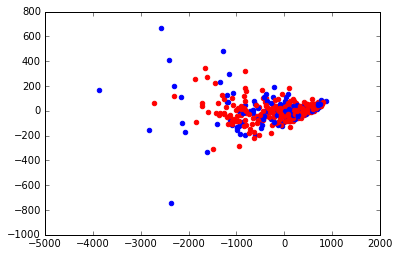

In [321]:
from sklearn.decomposition import PCA

cancer_x_tot = np.concatenate((Cancer.X_lab,Cancer.X_unlab))
pca=PCA(n_components=2)
X_transf = pca.fit(cancer_x_tot).transform(cancer_x_tot)
var_expl = a.explained_variance_ratio_

X_transf.shape

colors = ['blue', 'red']
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(X_transf)):
    ax.scatter(X_transf[i, 0]
               , X_transf[i, 1]
               , color = colors[pred[i]])
#plt.title('dataset for noise = %.3f' %x)

### Question 10 : Complete the code in the box below

###### Closed form expression :

- $ min_{f \in H_K}\frac{1}{l} \sum_{i=1}^l (y_i - f(x_i))^2 + \lambda\| f \|_{H_K}^2 + \frac{\lambda_u^2}{u+l} f^\top L f $

- The representer theorem gives us $ f^*(x) = \sum_{j=1}^{l+u} K(x,x_j)\alpha_i^* + b $

- We derive with regard to $ \alpha$ and get the following closed formula, which is computed with b = 0.

$$
\alpha^* = (JK + \gamma_AlI + \frac{\gamma_Il}{(u+l)^2} LK)^{-1}Y 
$$

We worked with b = 0 as it is only an offset constant, but the general case would give us the following equations (if we derive w.r.t b as well):
$$
\alpha^* = (JK + \gamma_AlI + \frac{\gamma_Il}{(u+l)^2} LK)^{-1} (Y- b\mathbb{1})
$$
$$
\frac{\mathbb{1}}{l} (Y- b\mathbb{1} - JK\alpha) = 0
$$

With $\mathbb{1}$ the vector column containing l times 1 et then u times 0. This does not lead to an obvious closed formula, but we can theoretically get it.

In [322]:
from sklearn.metrics.pairwise import rbf_kernel # Or reimplement it yourself if your prefer
from scipy.linalg import block_diag

### Question 11 : Complete the code in the box below

In [272]:
import time


S = [Cancer.X_lab, Cancer.y_lab]
U = [Cancer.X_unlab, Cancer.y_unlab]


# def l_2(x, y):
#     return np.sum((x - y)**2)

l = len(S[0])
u = len(U[0])

gamma_a = 0.001 # Reg
gamma = 1 # gamma in K
X = np.concatenate((S[0], U[0]))

def LapRLS(data_lab, data_unlab, target_lab, target_unlab, gamma_i, gamma_a, gamma):

    S = [data_lab, target_lab]
    U = [data_unlab, target_unlab]
    X = np.concatenate((S[0], U[0]))
    
    l = len(S[0])
    u = len(U[0])
    
    ######### Define useful matrices ########
    
    # define J
    J = np.zeros((len(X), len(X)))
    for i in range(u):
        J[i, i] = 1

    # Define K
    K = rbf_kernel(X, gamma=gamma)

    # Define L
    D = np.diag(np.sum(K, axis=1))
    L = D - K

    # Define 1 column
    unity = np.zeros(u + l)
    for i in range(l):
        unity[i] = 1

    # Define Y
    Y = np.zeros(u + l)
    for i in range(l):
        Y[i] = S[1][i]

    # Define F
    F = J.dot(K) + gamma_a*l*np.identity(u + l) + ((gamma_i)/(u + l)**2)*L.dot(K)
    # H = np.linalg.cholesky(F)
    
    # Invert the matrix
    inv = np.linalg.inv(F)
    
    
    ######### Get alpha and give predictions ###########

    # Get the closed form result
    alpha = inv.dot(Y)
    
    
    # Form the array of predictions

    pred = np.zeros(len(alpha))
    for i in range(len(alpha)):
        pred[i] = K[i,:].dot(alpha)

    return pred

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


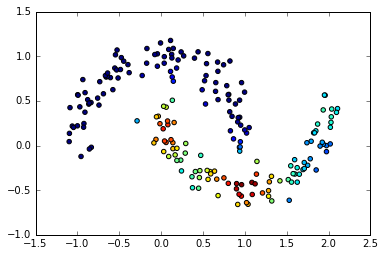

In [393]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.1)
p_unlabelled = 0.6
data_lab = noisy_moons[0][:(1-p_unlabelled)*len(noisy_moons[1])]
data_unlab = noisy_moons[0][(1-p_unlabelled)*len(noisy_moons[1]):]
target_lab = noisy_moons[1][:(1-p_unlabelled)*len(noisy_moons[1])]
target_unlab = noisy_moons[1][(1-p_unlabelled)*len(noisy_moons[1]):]

pred = LapRLS(data_lab, data_unlab, target_lab, target_unlab, 1, 1, 10)

plt.scatter(list(noisy_moons[0][:,0]), list(noisy_moons[0][:,1]), c=np.array(pred))
plt.show()

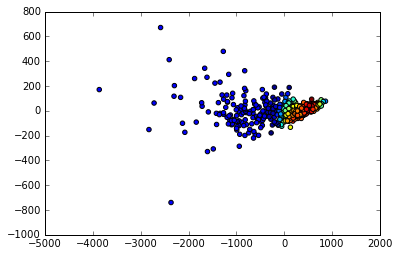

In [394]:
p_unlabelled = 0.8 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')

data_lab = Cancer.X_lab
data_unlab = Cancer.X_unlab
target_lab = Cancer.y_lab
target_unlab = Cancer.y_unlab

pred = LapRLS(data_lab, data_unlab, target_lab, target_unlab, 0.001, 0.01, 0.00001)

cancer_x_tot = np.concatenate((Cancer.X_lab,Cancer.X_unlab))
pca=PCA(n_components=2)
X_transf = pca.fit(cancer_x_tot).transform(cancer_x_tot)
var_expl = pca.explained_variance_ratio_

X_transf.shape

plt.scatter(list(X_transf[:,0]), list(X_transf[:,1]), c=np.array(pred))
plt.show()

### Question 12 : Add your answer here

- When using the closed form, we invert a matrix, which is very poorly scalable.

- It is maybe possible that the matrix becomes non invertible.

### Question 13 : Complete the code in the box below

### Stochastic Gradient Descent (SGD)

Let's remind us with the SGD algorithm.

- Start with a vector $\alpha$ null
- Pick $i$ uniformly at random in $\{1, \ldots, n\}$
- Apply
$$
\alpha_{t+1} \gets \alpha_t - \frac{\eta_0}{\sqrt{t+1}} \nabla f_i(\alpha_t)
$$

where $\eta_0$ is a step-size paramter that we take equal to 1. (May be optimized later on).

In [386]:
S = [Cancer.X_lab, Cancer.y_lab]
U = [Cancer.X_unlab, Cancer.y_unlab]

l = len(S[0])
u = len(U[0])


gamma_i = 1
gamma_a = 1 # Reg
gamma = 1 # gamma in K
X = np.concatenate((S[0], U[0]))
Y = np.concatenate((S[1], U[1]))
step = 1
n_iter = 60

def LapRLS_SGD(data_lab, data_unlab, target_lab, target_unlab, gamma_i, gamma_a, gamma, n_iter, step):

    S = [data_lab, target_lab]
    U = [data_unlab, target_unlab]
    X = np.concatenate((S[0], U[0]))
    
    l = len(S[0])
    u = len(U[0])
    alpha = np.random.normal(loc = 0, scale = 1, size = len(X))

    # gradients = np.zeros((n_iter, l + u))
    grad_norm = np.zeros((n_iter))
    K = rbf_kernel(X, gamma = 0.001)

    D = np.diag(np.sum(K, axis=1))
    L = D - K

    for i in range(n_iter):

        j = np.random.randint(1, l + u)

        if j <= l:

            grad = -2*K[j, :]*(Y[j] - np.dot(K[j, :], alpha)) 
            + 2*gamma_a*K.dot(alpha) + 2*(gamma_i/(u + l)**2)*K.dot(L.dot(K.dot(alpha)))

        else:
            grad = 2*K[j, :]*np.dot(K[j, :], alpha)
            + 2*gamma_a*K.dot(alpha) + 2*(gamma_i/(u + l)**2)*K.dot(L.dot(K.dot(alpha)))

        alpha -= (step)*grad/l/np.sqrt(i+1)
        
    #     gradients[i] = grad
        grad_norm[i] = np.linalg.norm(grad)
        
    # Form the array of predictions

    pred = np.zeros(len(alpha))
    for i in range(len(alpha)):
        aux = K[i,:].dot(alpha) 
        if aux > 0:
            pred[i] = 1
        else:
            pred[i] = -1
   

    return pred

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


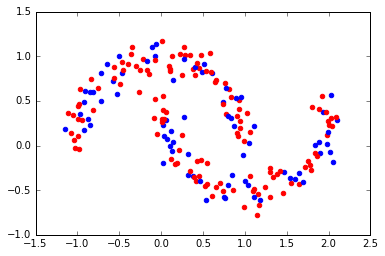

In [391]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.1)
p_unlabelled = 0.6
data_lab = noisy_moons[0][:(1-p_unlabelled)*len(noisy_moons[1])]
data_unlab = noisy_moons[0][(1-p_unlabelled)*len(noisy_moons[1]):]
target_lab = noisy_moons[1][:(1-p_unlabelled)*len(noisy_moons[1])]
target_unlab = noisy_moons[1][(1-p_unlabelled)*len(noisy_moons[1]):]

pred = LapRLS_SGD(data_lab, data_unlab, target_lab, target_unlab, 0.0001, 1, 0.0001, n_iter = 50, step = 1)

#plt.scatter(list(noisy_moons[0][:,0]), list(noisy_moons[0][:,1]), c=np.array(pred))
#plt.show()

colors = ['blue', 'yellow', 'red']
fig = plt.figure()
ax = fig.add_subplot(111)
noisy_moons = make_moons(n_samples = n_samples, noise = 0.1)
for i in range(len(noisy_moons[0])):
    ax.scatter(noisy_moons[0][i, 0]
               , noisy_moons[0][i, 1]
               , color = colors[np.int(pred[i])+1])

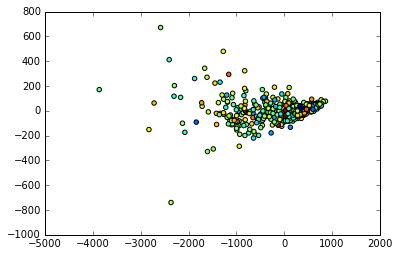

In [360]:
p_unlabelled = 0.8 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')

data_lab = Cancer.X_lab
data_unlab = Cancer.X_unlab
target_lab = Cancer.y_lab
target_unlab = Cancer.y_unlab

pred = LapRLS_SGD(data_lab, data_unlab, target_lab, target_unlab, 0.001, 0.01, 0.00001, 100, 1)

cancer_x_tot = np.concatenate((Cancer.X_lab,Cancer.X_unlab))
pca=PCA(n_components=2)
X_transf = pca.fit(cancer_x_tot).transform(cancer_x_tot)
var_expl = pca.explained_variance_ratio_

X_transf.shape

plt.scatter(list(X_transf[:,0]), list(X_transf[:,1]), c=np.array(pred))
plt.show()t

### Question 14 : Complete the code in the box below

##### Add your answer to the question here :

- $ min_{f \in H_K}\frac{1}{l} \sum_{i=1}^l (1 - y_if(x_i))_+ + \lambda\| f \|_{H_K}^2 + \frac{\lambda_u}{(u+l)^2} f^\top L f $

- The representer theorem gives us $ f^*(x) = \sum_{j=1}^{l+u} K(x,x_j)\alpha_i^* + b $

- Thus, we want to solve the problem: $ min_{\alpha \in \mathbb{R}^{l + u}, \xi_i \in \mathbb{R}^l}\frac{1}{l} \sum_{i=1}^l \xi_i + \lambda\alpha^TK\alpha + \frac{\lambda_u}{(u+l)^2}\alpha^TKLK\alpha$, subject to $y_i(\sum_{j = 1}^{l + u}\alpha_jK(x_i, x_j) + b) \geqslant 1 - \xi_i, i = 1, ..., l$ and $\xi_i \geqslant 0, i = 1, ..., l$
- Introducing the Lagrangian and its multipliers $\beta_i$ and $\zeta_i$, we write: 
$L(\alpha, \xi, b, \beta, \zeta) = \frac{1}{l}\sum_{i = 1}^l\xi_i + \frac{1}{2}\alpha^T(2\lambda K + 2\frac{\lambda_u}{(u+l)^2}KLK)\alpha - \sum_{i = 1}^l\beta_i(y_i(\sum_{j = 1}^{l + u}\alpha_jK(x_i, x_j) + b) - 1 + \xi_i) - \sum_{i = 1}^l\zeta_i\xi_i$

- Setting the derivatives of $L$ w.r.t. $b$ and $\xi_i$ to $0$, we obtain a reduced Lagrangian: 

$L^R(\alpha, \beta) = \frac{1}{2}\alpha^T(2\lambda K + 2\frac{\lambda_u}{(u+l)^2}KLK)\alpha - \alpha^TKJ^TY\beta + \sum_{i = 1}^l\beta_i$ where $J = [I..0]$ and $Y = diag(y_1, y_2, ..., y_l)$

- Setting the derivarive w.r.t. \alpha to $0$, we obtain: 

$\alpha = (2\lambda I + 2\frac{\lambda_u}{(u+l)^2}LK)^{-1}J^TY\beta^{\star}$

- Substituting this value to reduced Lagrangian, we want now to solve: 

$\beta^{\star} = max_{\beta \in \mathbb{R}^l}\sum_{i = 1}^l\beta_i - \frac{1}{2}\beta^TQ\beta$ subject to: $\sum_{i = 1}^l\beta_iy_i = 0$ and $O \leqslant \beta_i \leqslant \frac{1}{l}, i = 1, ..., l$, where $Q = YJK(2\lambda I + 2\frac{\lambda_u}{(u+l)^2}LK)^{-1}J^TY$

In [379]:
from cvxopt import matrix, solvers

def LapSVM(data_lab, data_unlab, target_lab, target_unlab, gamma_i, gamma_a, gamma, p_unlabelled):


    # Use the dataset
    #Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')


    S = [data_lab, target_lab]
    U = [data_unlab, target_unlab]
    X = np.concatenate((S[0], U[0]))

    # Define useful costants
    l = len(S[0])
    u = len(U[0])

    #gamma_i = 0.1
    #gamma_a = 0.001 # Reg
    #gamma = 0.0001 # gamma in K

    # The values of the targets must be -1 or +1, instead of 0 or 1
    for i in range(l):
        if S[1][i] == 0:
            S[1][i] = -1
    for i in range(u):
        if U[1][i] == 0:
            U[1][i] = -1

    ########### Definition of several useful matrices ########     

    # Define Y
    Y = np.diag(S[1])

    # Define J
    J = np.zeros((l, l + u))
    for i in range(l):
        J[i, i] = 1

    # Define K
    K = rbf_kernel(X, gamma = gamma)

    # Define L
    D = np.diag(np.sum(K, axis=1))
    L = D - K

    # Define Q

    Q = Y.dot(J).dot(K).dot(np.linalg.inv(2*gamma_a*np.identity(l + u) 
                                          + 2*(gamma_i/(u + l)**2)*L.dot(K))).dot(J.T).dot(Y)

    ############ QP solver part ###################
    # Define elements to be passed to the QP solver

    P = matrix(Q)
    Q1 = matrix(-1*np.ones(l),(l,1))
    G = matrix(np.identity(l))
    b = matrix(0.0)

    h = [0 for i in range(2*l)]
    for j in range(2*l):
        if j%2 ==0:
            h[j] = 1./l
    h=matrix(h)

    G11 = np.array([0 for s in range(l)])
    G11[0]=1
    G12 = np.array([0 for s in range(l)])
    G12[0]=-1
    G1 = np.vstack((G11,G12))
    for i in range(l-1):
        G11=np.roll(G11,1)
        G12=np.roll(G12,1)
        G1 = np.vstack((G1,G11))
        G1 = np.vstack((G1,G12))

    G1=matrix(G1,(2*l,l),'d')

    A = matrix(S[1], (1,l),'d')

    # Perform the QP solver

    beta = solvers.qp(P, Q1, G1, h, A, b )['x']


    ######## Towards the final solution ###########
    # Deduce from beta the value of alpha

    alpha = np.linalg.inv(2*gamma_a*np.identity(u+l) + 2*(gamma_i/(u + l)**2)*L.dot(K)).dot(J.T).dot(Y).dot(beta)

    # Form the array of predictions

    pred = np.zeros(len(alpha))
    for i in range(len(alpha)):
        aux = K[i,:].dot(alpha)
        if aux > 0:
            pred[i] = 1
        else:
            pred[i] = -1
    
    
    return pred

In [380]:
from sklearn.decomposition import PCA

cancer_x_tot = np.concatenate((Cancer.X_lab,Cancer.X_unlab))
pca=PCA(n_components=2)
X_transf = pca.fit(cancer_x_tot).transform(cancer_x_tot)
var_expl = pca.explained_variance_ratio_

X_transf.shape

(569, 2)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


     pcost       dcost       gap    pres   dres
 0: -4.9773e+01 -2.0533e+00  4e+02  2e+01  5e-16
 1: -1.2073e+00 -2.0450e+00  5e+00  2e-01  7e-16
 2: -8.0989e-01 -1.4705e+00  7e-01  3e-17  6e-16
 3: -8.7930e-01 -9.5651e-01  8e-02  2e-17  6e-16
 4: -8.7999e-01 -8.8078e-01  8e-04  2e-17  6e-16
 5: -8.8000e-01 -8.8001e-01  8e-06  2e-17  6e-16
 6: -8.8000e-01 -8.8000e-01  8e-08  2e-17  5e-16
Optimal solution found.


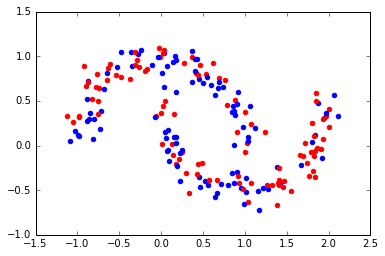

In [383]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.1)
p_unlabelled = 0.5
data_lab = noisy_moons[0][:(1-p_unlabelled)*len(noisy_moons[1])]
data_unlab = noisy_moons[0][(1-p_unlabelled)*len(noisy_moons[1]):]
target_lab = noisy_moons[1][:(1-p_unlabelled)*len(noisy_moons[1])]
target_unlab = noisy_moons[1][(1-p_unlabelled)*len(noisy_moons[1]):]

pred = LapSVM(data_lab, data_unlab, target_lab, target_unlab, 0.001, 1, 0.0000000001, 0.5)

#plt.scatter(list(noisy_moons[0][:,0]), list(noisy_moons[0][:,1]), c=np.array(pred))
#plt.show()

colors = ['blue', 'yellow', 'red']
fig = plt.figure()
ax = fig.add_subplot(111)
noisy_moons = make_moons(n_samples = n_samples, noise = 0.1)
for i in range(len(noisy_moons[0])):
    ax.scatter(noisy_moons[0][i, 0]
               , noisy_moons[0][i, 1]
               , color = colors[np.int(pred[i])+1])

In [373]:
colors[np.int(pred[1])]

'red'

     pcost       dcost       gap    pres   dres
 0: -6.0506e+00 -2.2682e+00  7e+02  3e+01  8e-15
 1: -5.3828e-01 -1.9844e+00  2e+01  9e-01  8e-15
 2: -2.0669e-01 -1.6383e+00  2e+00  3e-02  8e-16
 3: -1.9432e-01 -3.3093e-01  1e-01  2e-04  1e-15
 4: -2.1562e-01 -2.6224e-01  5e-02  5e-05  4e-16
 5: -2.2053e-01 -2.4690e-01  3e-02  2e-05  4e-16
 6: -2.2450e-01 -2.3518e-01  1e-02  4e-06  5e-16
 7: -2.2547e-01 -2.3138e-01  6e-03  1e-06  4e-16
 8: -2.2683e-01 -2.2790e-01  1e-03  4e-08  5e-16
 9: -2.2708e-01 -2.2751e-01  4e-04  6e-09  5e-16
10: -2.2717e-01 -2.2731e-01  1e-04  2e-09  4e-16
11: -2.2721e-01 -2.2724e-01  3e-05  4e-11  5e-16
12: -2.2722e-01 -2.2722e-01  5e-07  7e-13  6e-16
13: -2.2722e-01 -2.2722e-01  5e-09  7e-15  6e-16
Optimal solution found.


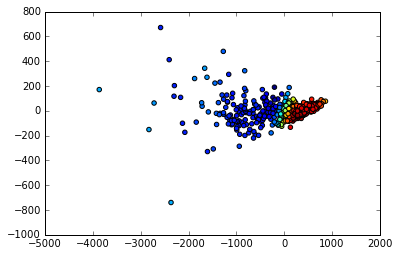

In [357]:
p_unlabelled = 0.8 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')

data_lab = Cancer.X_lab
data_unlab = Cancer.X_unlab
target_lab = Cancer.y_lab
target_unlab = Cancer.y_unlab

pred = LapSVM(data_lab, data_unlab, target_lab, target_unlab, 0.001, 0.01, 0.00001, 0.8)

cancer_x_tot = np.concatenate((Cancer.X_lab,Cancer.X_unlab))
pca=PCA(n_components=2)
X_transf = pca.fit(cancer_x_tot).transform(cancer_x_tot)
var_expl = pca.explained_variance_ratio_

X_transf.shape

plt.scatter(list(X_transf[:,0]), list(X_transf[:,1]), c=np.array(pred))
plt.show()

### Question 15 : Complete the code in the box below

In [ ]:
# This function still needs to be completed


#p_unlabeled_list = [0.4, 0.6, 0.8]

#for i in p_unlabeled_list:
#   pred1 = LapSVM(data_lab, data_unlab, target_lab, target_unlab, 0.001, 0.01, 0.00001, i)
#   pred2 = LapRLS_SGD(data_lab, data_unlab, target_lab, target_unlab, 0.001, 0.01, 0.00001, 100, 1)
#   pred3 = LapRLS(data_lab, data_unlab, target_lab, target_unlab, 0.001, 0.01, 0.00001)


### Question 16 : Complete the code in the box below

##### It seems that we have 4 main models to select automatically the hyperparameters for a semi-supervised task: 
- 5-fold Cross Validation
- MintEnt
- Loohl
- RobustHL

######  Our Source: Robust Graph Hyperparameter Learning for Graph Based Semi-supervised Classification http://www.krikamol.org/research/papers/robusthl.pdf

###### The idea of the protocol is the following : 
- We make a grid of paramters that we want to test, and select them with a criteria of average label entropy on unlabeled data points, i.e. we select hyperparameters which yield the most confident labeling on unlabeled data.

- It is however shown that this is not completely suffisant, and some authors find the parameters by using an extra critera which consists in minimizing the leave-one-out prediction error on labeled data.

- So these techniques rely on objective functions which are trade-offs between prediction error on labeled data and smoothness of label transition, which can be seen as a form of stability (roughly similar to what we saw in this work).